<a href="https://colab.research.google.com/github/idptools/idpcolab/blob/main/STARLING_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STARLING colab (STARLING 2.0)
Welcome to the STARLING colab notebook. This notebook enables you to setup STARLING using a Google Colab instance and generate ensemble of disordered proteins directly from sequence.

### About
This notebook allows you to predict an ensemble of conformations from

### Reference

**Accurate predictions of conformational ensembles of disordered proteins with STARLING.**
Novak, B., Lotthammer, J. M., Emenecker, R. J. & Holehouse, A. S. bioRxiv 2025.02. 14.638373 (2025). [doi:10.1101/2025.02.14.638373](https://doi.org/10.1101/2025.02.14.638373)
  


### Changelog


In [2]:
#@title ▶️ Start notebook (installs deps, checks GPU) { display-mode: "form" }
from IPython.display import display, HTML
import os
display(HTML("""
<p><b>Welcome to STARLING Colab</b> 👋<br>
This cell must be run once to set up the STARLING environment.<br>
</p>
"""))

# You can tweak verbosity by toggling CAPTURE_OUTPUT below.
CAPTURE_OUTPUT = True  # set to False if you want to see full logs

import os, sys, subprocess, textwrap
from IPython.display import display, HTML, clear_output
import ipywidgets as widgets

def sh(cmd, check=True):
    """Run a shell command in a login bash so $PATH updates stick."""
    return subprocess.run(["bash", "-lc", cmd], check=check)

def start():
    if CAPTURE_OUTPUT:
        print('Setting up STARLING environment...')
        from contextlib import redirect_stdout, redirect_stderr
        from io import StringIO
        _buf_out, _buf_err = StringIO(), StringIO()
        with redirect_stdout(_buf_out), redirect_stderr(_buf_err):
            _do_setup()
        # Show only a concise success / GPU status message
        _final_message()
    else:
        _do_setup()
        _final_message()

def _do_setup():
    print("Setting up environment…")
    # Install uv (adds to ~/.cargo/bin)
    sh("curl -LsSf https://astral.sh/uv/install.sh | sh")
    # Add uv to PATH for the current Python process
    os.environ["PATH"] += f":{os.environ['HOME']}/.cargo/bin"
    # Use uv to install your package (quietly)
    sh("uv pip install -q idptools-starling")
    sh("uv pip install -q ipywidgets")
    sh("uv pip install -q afrc")

    # Optional: pre-import torch to check GPU
    import torch  # noqa: F401

    # Import starling so generate() is ready for users
    global generate
    from starling import generate  # noqa: F401
    globals()["generate"] = generate

def _final_message():
    import torch
    if not torch.cuda.is_available():
        display(HTML(
            "<div style='color:#b00020; font-weight:bold; font-size:14px;'>"
            "🚨 GPU not detected!<br>"
            "Go to <b>Runtime → Change runtime type → Hardware accelerator → GPU</b> and select <b>GPU</b>."
            "</div>"
        ))
    else:
        name = torch.cuda.get_device_name(0)
        display(HTML(
            f"<div style='color:#0b8043; font-weight:bold; font-size:14px;'>"
            f"✅ Setup complete. GPU active: {name}</div>"
        ))
        from starling import generate
        print('Downloading STARLING network weights (this only needs to happen once!)...')
        tmp = generate('EPEPEPEPEPE', conformations=1, verbose=False)
        print('Weights downloaded!')


def show_sm(e):
  from afrc import AnalyticalFRC
  import matplotlib
  import matplotlib.pyplot as plt
  from matplotlib.pyplot import figure
  from mpl_toolkits.axes_grid1 import make_axes_locatable
  import matplotlib as mpl

  mpl.rcParams['xtick.major.pad'] = 1
  mpl.rcParams['ytick.major.pad'] = 1

  mpl.rcParams['xtick.major.size'] = 2  # Major tick length for x-axis
  mpl.rcParams['xtick.minor.size'] = 0.5   # Minor tick length for x-axis
  mpl.rcParams['ytick.major.size'] = 2  # Major tick length for y-axis
  mpl.rcParams['ytick.minor.size'] = 0.5   # Minor tick length for y-axis

  mpl.rcParams['xtick.major.width'] = 0.375  # Major tick width for x-axis
  mpl.rcParams['ytick.major.width'] = 0.375  # Major tick width for y-axis
  mpl.rcParams['xtick.minor.width'] = 0.375  # Major tick width for x-axis
  mpl.rcParams['ytick.minor.width'] = 0.375  # Major tick width for y-axis

  # Set such that PDF fonts export in a manner that they
  # are editable in illustrator/affinity
  matplotlib.rcParams['pdf.fonttype'] = 42
  matplotlib.rcParams['ps.fonttype'] = 42

  # set to define axes linewidths
  matplotlib.rcParams['axes.linewidth'] = 0.375

  sm = e.distance_maps(return_mean=True)/AnalyticalFRC(e.sequence).get_distance_map(symmetric_map=True)

  fig, ax = plt.subplots(figsize=(2.5, 2.5), dpi=450)

  # Main image
  im = ax.imshow(sm, cmap='PuOr_r', vmin=0.95, vmax=1.2, origin='lower')

  # Match colorbar height to the image
  divider = make_axes_locatable(ax)
  cax = divider.append_axes("right", size="5%", pad=0.05)

  # Colorbar with matched height
  cbar = plt.colorbar(im, cax=cax)
  cbar.ax.tick_params(labelsize=6)  # set font size of colorbar ticks

  # Axis tick font sizes
  ax.tick_params(labelsize=6)

  plt.show()

start()  # runs when this cell is executed

Setting up STARLING environment...


100%|██████████| 258M/258M [00:05<00:00, 46.0MB/s]
100%|██████████| 1.53G/1.53G [00:18<00:00, 86.9MB/s]


Using DDIM sampler


Progress through sequences:   0%|          | 0/1 [00:00<?, ?it/s]

DDIM steps (batch 1 of 1):   0%|          | 0/31 [00:00<?, ?it/s]

Weights downloaded!


Generating 60 conformation(s) for sequence:
EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
Ionic Strength: 20 mM
Using DDIM sampler


Progress through sequences:   0%|          | 0/1 [00:00<?, ?it/s]

DDIM steps (batch 1 of 1):   0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

✅ Saved: ensemble.pdb


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-1904818718.py:104: RuntimeWarning: invalid value encountered in divide
  sm = e.distance_maps(return_mean=True)/AnalyticalFRC(e.sequence).get_distance_map(symmetric_map=True)


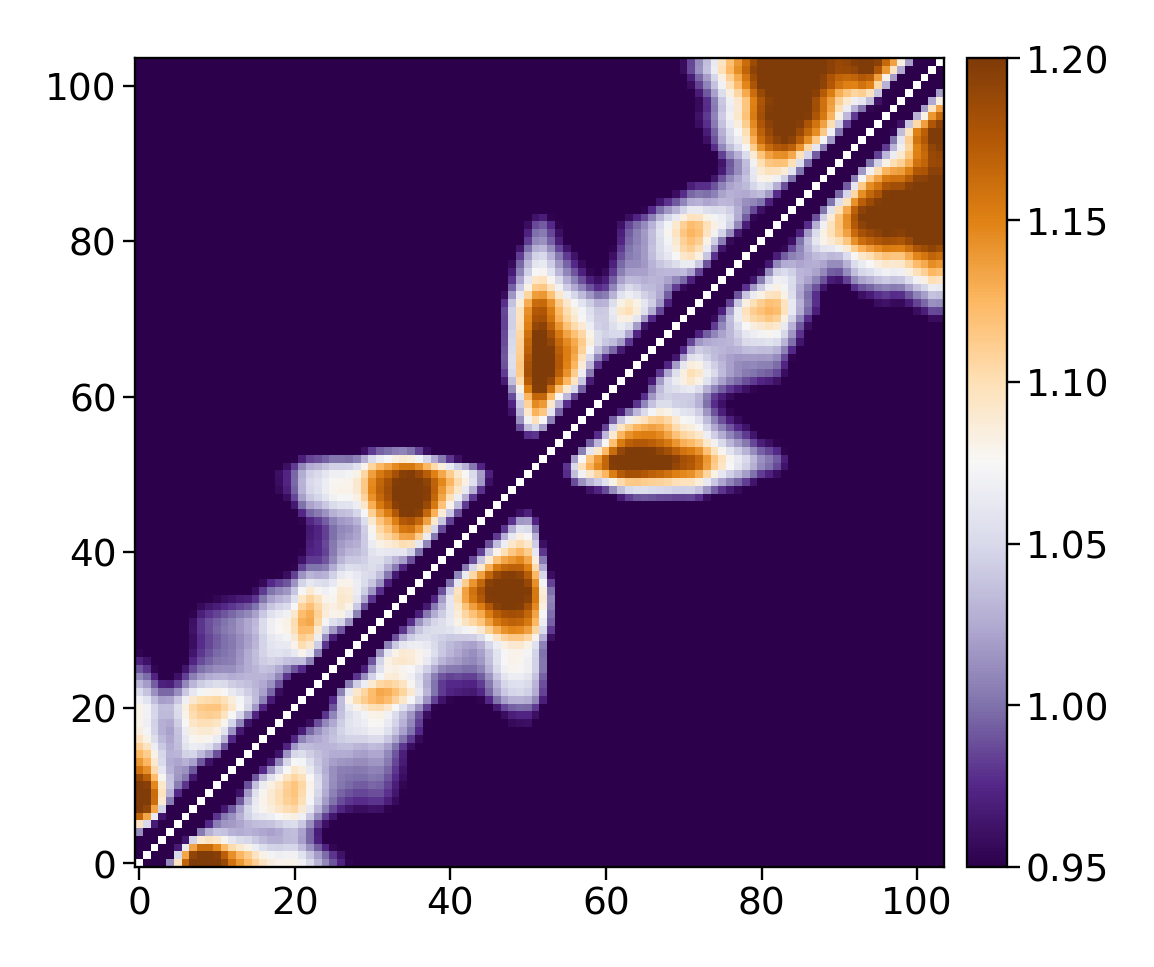

In [12]:
#@title ▶️ Predict ensembles + auto-download { display-mode: "form" }

import os, time
from google.colab import files

# --- Plain form fields (no ipywidgets) ---
sequence = "EEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEEKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK" #@param {type:"string"}
conformations = 60 #@param {type:"slider", min:10, max:1000, step:50}
ionic_strength = 60 #@param {type:"slider", min:20, max:300, step:1}
auto_download = True #@param {type:"boolean"}
show_scaling_map = True #@param {type:"boolean"}

def _wait_for_file(path, timeout=60):
    t0 = time.time()
    while not os.path.exists(path):
        if time.time() - t0 > timeout:
            return False
        time.sleep(0.1)
    return True

# --- Main logic ---
if not sequence.strip():
    print("❌ Please enter a protein sequence.")
else:



    if len(sequence) > 382:
      print("❌ Cannot cope with sequences > 382 residues.")

    elif len(sequence) < 3:
      print("❌ Cannot cope with sequences < 3 residues.")
    else:
      print(f"Generating {conformations} conformation(s) for sequence:\n{sequence}")
      print(f"Ionic Strength: {ionic_strength} mM")

      # Assume `generate` exists
      e = generate(
          sequence,
          conformations=conformations,
          return_single_ensemble=True,
          pdb_trajectory=True,
          ionic_strength=ionic_strength
      )

      pdb_path = 'ensemble.pdb'
      if os.path.exists(pdb_path):
          os.remove(pdb_path)

      e.save_trajectory('ensemble', pdb_trajectory=True)

      if _wait_for_file(pdb_path, timeout=60):
          print(f"✅ Saved: {pdb_path}")
          if auto_download:
              files.download(pdb_path)
      else:
          print("❌ Failed to save ensemble.pdb within timeout.")

      if show_scaling_map:
          show_sm(e)